MODEL TRAINING(Random Forest Model)

In [19]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.preprocessing import LabelEncoder  # Label encoding for target variable
from sklearn.metrics import accuracy_score, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import train_test_split  # To split the dataset
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Data visualization library

In [20]:
# Load training data
df = pd.read_csv('Dataset\\training_data.csv')  # Read the training dataset
df.head()  # Display the first few rows of the dataset to understand its structure

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [21]:
# Encode target variable
encoder = LabelEncoder()  # Initialize the label encoder
df['prognosis'] = encoder.fit_transform(df.prognosis)  # Encode the 'prognosis' column to convert categorical labels to numeric

In [22]:
# Drop unnecessary column
df = df.drop(['Unnamed: 133'], axis=1)  # Drop the 'Unnamed: 133' column, which is not needed for the analysis
df.head()  # Display the first few rows of the dataset after dropping the column to verify changes

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [23]:
# Check correlations
df.corr()  # Calculate and display the correlation matrix to understand relationships between variables

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


In [24]:
# Check for missing values
df.isnull().sum()  # Check for missing values in each column to ensure data quality

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [25]:
# Define features and target variable
X = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]  # Select the last column as the target variable

In [26]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Initialize lists to store accuracies
max_depth_values = range(1, 21)
training_accuracy_values = []
validation_accuracy_values = []

In [28]:
# Train RandomForestClassifier with different max_depth values
for max_depth in max_depth_values:
    rfc = RandomForestClassifier(max_depth=max_depth, random_state=0)  # Initialize the Random Forest Classifier with max_depth
    rfc.fit(X_train, y_train)  # Fit the model to the training data to train the classifier
    train_acc = accuracy_score(y_train, rfc.predict(X_train))  # Calculate training accuracy
    val_acc = accuracy_score(y_val, rfc.predict(X_val))  # Calculate validation accuracy
    training_accuracy_values.append(train_acc)
    validation_accuracy_values.append(val_acc)

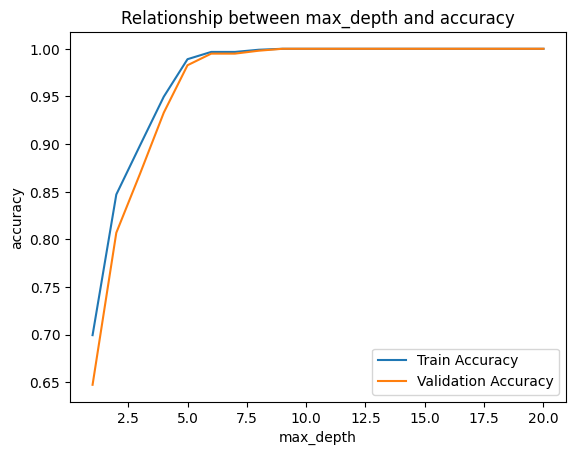

In [29]:
# Plot the relationship between max_depth and accuracy
plt.plot(max_depth_values, training_accuracy_values, label="Train Accuracy")
plt.plot(max_depth_values, validation_accuracy_values, label="Validation Accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

In [30]:
# Load testing data
test = pd.read_csv('Dataset\\test_data.csv')  # Read the testing dataset
test.head()  # Display the first few rows of the testing dataset to understand its structure

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [31]:
# Encode target variable in test data
test['prognosis'] = encoder.transform(test.prognosis)  # Encode the 'prognosis' column in the test data to match training data encoding

In [32]:
# Define test features and target
testx = test.iloc[:, :-1]  # Select all columns except the last one as features in the test data
testy = test.iloc[:, -1]  # Select the last column as the target variable in the test data

In [33]:
# Predict using the trained model with optimal max_depth
optimal_rfc = RandomForestClassifier(max_depth=10, random_state=0)  # Using max_depth=10
optimal_rfc.fit(X_train, y_train)
y_pred = optimal_rfc.predict(testx)  # Predict the target variable for the test data using the trained model

In [34]:
# Evaluate the model
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, optimal_rfc.predict(X_train)) * 100:.2f}%")  # Print the accuracy on the training data to evaluate model performance
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(testy, y_pred) * 100:.2f}%")  # Print the accuracy on the test data to evaluate model performance

Accuracy on train data by Random Forest Classifier: 100.00%
Accuracy on test data by Random Forest Classifier: 97.62%


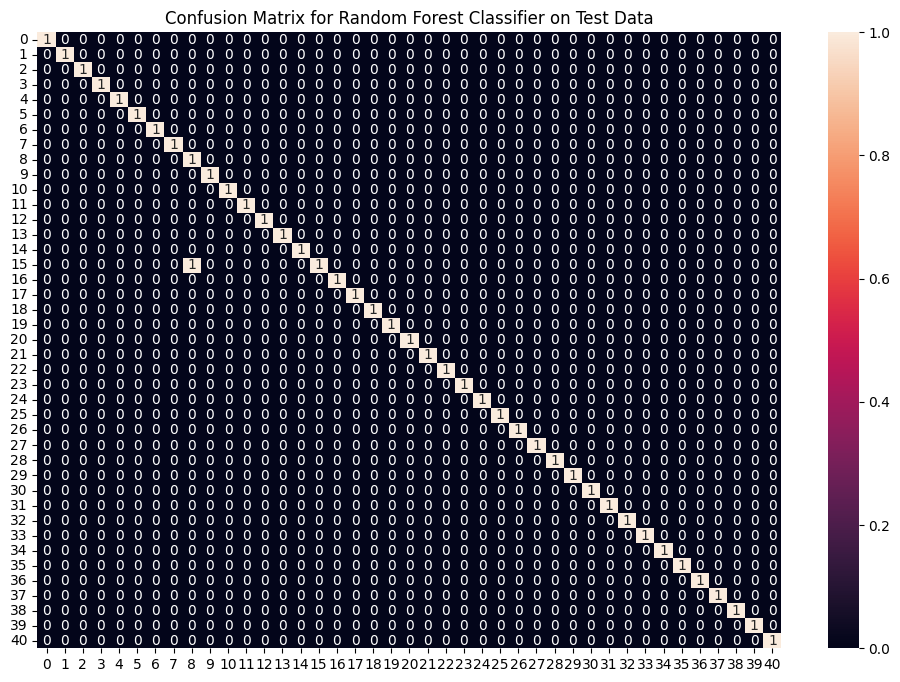

In [35]:
# Plot confusion matrix
cf_matrix = confusion_matrix(testy, y_pred)  # Compute the confusion matrix to understand the performance of the classifier
plt.figure(figsize=(12, 8))  # Set the figure size for the plot
sns.heatmap(cf_matrix, annot=True, fmt='d')  # Plot the confusion matrix with annotations to visualize the results
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")  # Set the title of the plot for clarity
plt.show()  # Display the plot to visualize the confusion matrix